In [1]:
!pip install Platypus-Opt

In [2]:
import platypus as pty
import matplotlib.pyplot as plt
import numpy as np

# Problem 1



$$    
    X1 = [x11, ..., x1n\\
    X2 = x21, ..., x2n\\ 
    Xm = xm1, ..., xmn 
$$               
   
$$    
    Y1 = y11, ..., y1n\\ 
    Y2 = y21, ..., y2n\\         
    Ym = ym1, ..., ymn     
                
$$

$$
X = [X1, \ldots, X_m]
$$

$$
Y = [y1, \ldots, y_m]
$$

In [19]:
def functions(x):
    import numpy as np
    x = np.array(x)
    return [np.cos(x[0])*(x[1]**3 - 1) , np.sin(np.sqrt(x[0]**2 + x[1]**2)) ]

n = 10
x = [list(np.random.uniform(-5,5,n)),
     list(np.random.uniform(-5,5,n))]

F = functions(x)

In [5]:
# two arguments: number of decision variables (2)  number of objectives (2)
problem = pty.Problem(2, 2)
# Next,  we specify the types of the decision variables. In this case, we use a real-valued variable bounded between -10 and 10.
problem.types[:] = pty.Real(-5, 5)
# define the function for evaluating the problem.
problem.function = functions

# NSGAII, NSGAIII, CMAES, GDE3, IBEA, MOEAD, OMOPSO, SMPSO, SPEA2, EpsMOEA
algorithm = pty.NSGAII(problem)

# run optimization
algorithm.run(10000)
# display the results
for solution in algorithm.result:
    print(solution.objectives)



[-123.99982110116031, -0.3683488719828103]
[-24.04817493303204, -0.9999999850328897]
[-50.95036268326527, -0.9999999177699233]
[-84.76571035812903, -0.8345060576324582]
[-62.94471251627036, -0.974371390595448]
[-60.59506228990694, -0.9833723658817489]
[-121.0891485099772, -0.4685355776540314]
[-89.68751774331677, -0.7890977534270748]
[-111.91016822158066, -0.5758673391784491]
[-120.23149174787328, -0.4843695528035863]
[-82.97317608786885, -0.8490249857769792]
[-80.99324620735122, -0.8569807175760895]
[-123.50280858754786, -0.40759585811996574]
[-110.69224172711019, -0.582332945981746]
[-122.80238275794176, -0.43581921073643504]
[-92.55061731484923, -0.7661165025945277]
[-85.8610896852495, -0.8253313971372384]
[-94.07825715061608, -0.7524149819343604]
[-79.8519507436805, -0.8719252847402462]
[-116.79022849008525, -0.5254551567669346]
[-101.16114922126962, -0.6847280349902931]
[-90.92084036195051, -0.7802484630773534]
[-94.8124102059681, -0.7450062535598078]
[-88.84019466961405, -0.79873

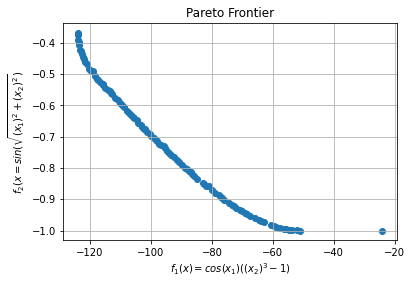

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlabel("$f_1(x) = cos(x_1) ((x_2)^3-1)$")
plt.ylabel("$f_2(x = sin(\sqrt{(x_1)^2 + (x_2)^2})  $")
plt.grid()
plt.title('Pareto Frontier')
plt.show()


# Problem 2

In [22]:
problem = pty.DTLZ2(3)

algorithms = [pty.NSGAII,
              (pty.NSGAIII, {"divisions_outer": 12}),
              (pty.CMAES, {"epsilons": [0.05]}),
              pty.GDE3,
              pty.IBEA,
              (pty.MOEAD, {"weight_generator": pty.normal_boundary_weights, "divisions_outer": 12}),
              (pty.OMOPSO, {"epsilons": [0.05]}),
              pty.SMPSO,
              pty.SPEA2,
              (pty.EpsMOEA, {"epsilons": [0.05]})]

# run the experiment using Python 3's concurrent futures for parallel evaluation
with pty.ProcessPoolEvaluator() as evaluator:
    results = pty.experiment(algorithms, problem, seeds=1, nfe=10000, evaluator=evaluator)

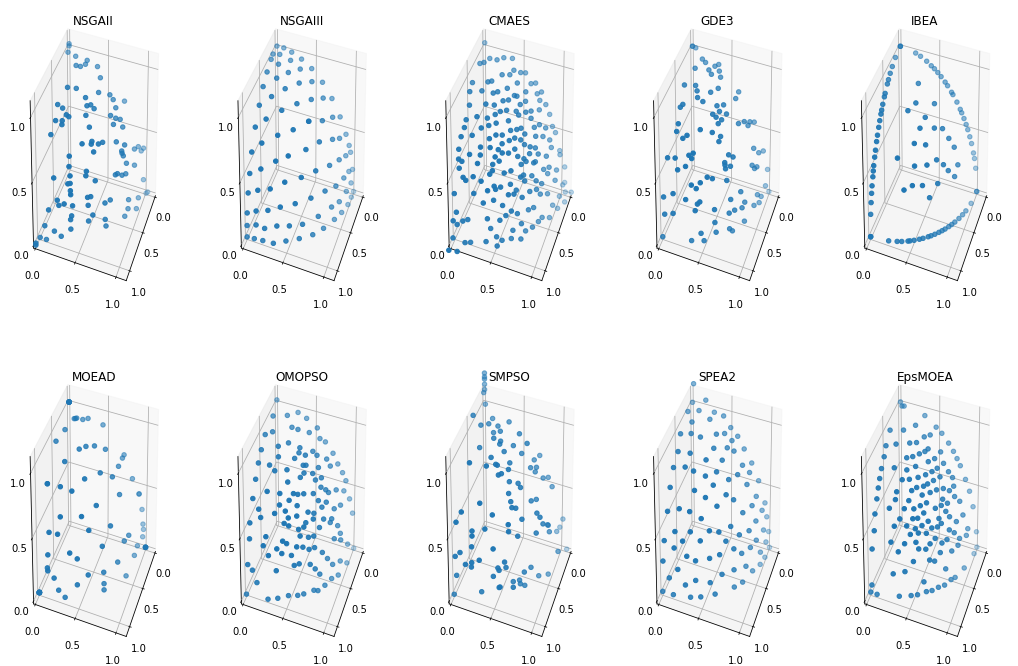

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,12))

for i, algorithm in enumerate(pty.six.iterkeys(results)):
    result = results[algorithm]["DTLZ2"][0]

    ax = fig.add_subplot(2, 5, i + 1, projection='3d')
    ax.scatter([s.objectives[0] for s in result],
                [s.objectives[1] for s in result],
                [s.objectives[2] for s in result])
    ax.set_title(algorithm)
    ax.set_xlim([0, 1.1])
    ax.set_ylim([0, 1.1])
    ax.set_zlim([0, 1.1])
    ax.view_init(elev=30.0, azim=20.0)
    ax.locator_params(nbins=4)

plt.show()

# example 3

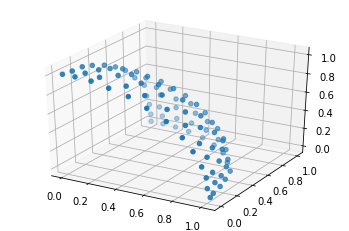

In [27]:
# define the problem definition
# https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php
n_vars = 3
problem = pty.DTLZ2(n_vars)

# instantiate the optimization algorithm
# Nondominated Sorting Genetic Algorithm III (NSGA III)
# https://deap.readthedocs.io/en/master/examples/nsga3.html
algorithm = pty.NSGAIII(problem, divisions_outer=12)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

# plot the results using matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
plt.show()

# example 4

[2.882810335687515e-06, 1.0014555888192616]
[1.0033223441912031, 1.1238376793857312e-05]
[0.4066234819535096, 0.9147937844860745]
[0.37617689944989513, 0.9274019222845449]
[0.3419801693547634, 0.9405589794034528]
[0.07778736091983716, 0.9978346454726313]
[0.9914536683311606, 0.133946623064851]
[0.9958280406747577, 0.10045304445703215]
[0.3124382855054005, 0.9503926534986152]
[0.4283665585231391, 0.904159991419917]
[0.8643409246394576, 0.5039284659849304]
[0.10945581987052348, 0.9951220270678871]
[0.711824954198642, 0.7035093786855336]
[0.8520439946581678, 0.5254390237089247]
[0.029785481710156478, 1.0003437515244864]
[0.05372631587848946, 0.9992588893419375]
[0.6996836495349428, 0.7159840185254235]
[0.23609455491863582, 0.9722041946279337]
[0.5806755625207556, 0.8154245828491024]
[0.7269234001302874, 0.6896156841169662]
[0.2596969172290791, 0.9670766864402216]
[0.35883879969713517, 0.9340521939250804]
[0.4878620034146069, 0.8733006893363793]
[0.9999229086553417, 0.03832482913248533]
[0

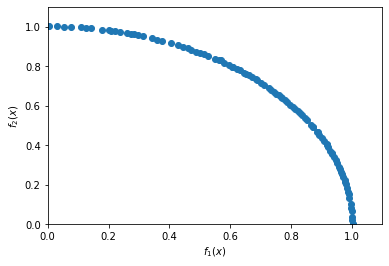

' Note that we did not need to specify many settings when constructing NSGA-II. For any options not specified by the user, \nPlatypus supplies the appropriate settings using best practices. In this example, Platypus inspected the problem definition to \ndetermine that the DTLZ2 problem consists of real-valued decision variables and selected the Simulated Binary Crossover (SBX) \nand Polynomial Mutation (PM) operators. \nOne can easily switch to using different operators, such as Parent-Centric Crossover (PCX):\n'

In [28]:

# define the problem definition
# define the problem definition
# https://sop.tik.ee.ethz.ch/download/supplementary/testproblems/dtlz2/index.php
problem = pty.DTLZ2()

# instantiate the optimization algorithm
# Nondominated Sorting Genetic Algorithm III(NSGA II)
# https://deap.readthedocs.io/en/master/examples/nsga3.html
algorithm = pty.NSGAII(problem)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

# display the results
for solution in algorithm.result:
    print(solution.objectives)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.show()



""" Note that we did not need to specify many settings when constructing NSGA-II. For any options not specified by the user, 
Platypus supplies the appropriate settings using best practices. In this example, Platypus inspected the problem definition to 
determine that the DTLZ2 problem consists of real-valued decision variables and selected the Simulated Binary Crossover (SBX) 
and Polynomial Mutation (PM) operators. 
One can easily switch to using different operators, such as Parent-Centric Crossover (PCX):
"""




# Problem 5

[6.424350550270676e-17, 1.049176065253028]
[1.0167841811697074, 0.0]
[0.75600194217676, 0.6574658522350443]
[0.9686844184775617, 0.2777090888618487]
[0.8711198552024683, 0.5022867797092856]
[0.7893079752394232, 0.6212464127301028]
[0.9780281441358883, 0.24456728118290583]
[0.7365480286446242, 0.6796909173230755]
[0.7712689064425194, 0.6427507596627494]
[0.8897271954094094, 0.4665196013802195]
[0.9085848354296847, 0.4288331780913154]
[0.66223817184924, 0.753394896275298]
[0.46447279864326607, 0.9029991331899863]
[0.9981468276045362, 0.1574768078018502]
[0.5786065050568296, 0.8249125810564236]
[0.8488831110457159, 0.5395880317031735]
[0.1887528569217465, 1.0149803264471562]
[0.9198519269912386, 0.4052780387094471]
[0.6108832662054907, 0.7992149642176037]
[0.4412653252317559, 0.9153207362889554]
[0.6790421606643476, 0.7400998295754817]
[0.4908612451316918, 0.8821049114752433]
[1.0153311268408745, 0.024331658765600207]
[0.8978755751625926, 0.450853701823351]
[0.40681674742298046, 0.9345134

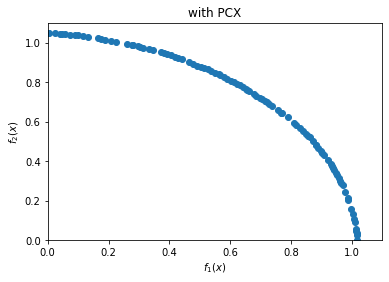

In [30]:
algorithm_pcx = pty.NSGAII(problem, variator = pty.PCX())
algorithm_pcx.run(10000)


# display the results
for solution in algorithm_pcx.result:
    print(solution.objectives)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([s.objectives[0] for s in algorithm_pcx.result],
            [s.objectives[1] for s in algorithm_pcx.result])
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.title('with PCX')
plt.show()






# Problem 6

[3.9981398177341503, 2.1631768060011434e-07]
[1.739625669391993e-07, 4.001668526764293]
[0.7445572220860777, 1.2930480516828984]
[0.40467892174407005, 1.860103761151418]
[0.469592263081436, 1.7285201718545424]
[3.8410407347348743, 0.0016114343483985413]
[0.07483526295521481, 2.980593878578149]
[0.6526659362329049, 1.4211562302709255]
[0.37538160429457, 1.9246458640089879]
[0.031634834836299634, 3.3201874668737816]
[0.09554401298156245, 2.8591362292366527]
[3.2350284539065224, 0.040554514659514596]
[2.3406573510472377, 0.22097454744084463]
[2.232057875607971, 0.2560285910639656]
[3.1424874419466446, 0.05166244966638711]
[0.23160677526337323, 2.3065851119530687]
[0.018990820150936227, 3.4677620814090417]
[1.3922684602388726, 0.6724914142522762]
[0.20384469884232545, 2.397878148355521]
[2.7025331738929914, 0.12677992561125082]
[0.003626924873282612, 3.762731100973154]
[0.337904477102031, 2.012722412481607]
[0.0006620527906122089, 3.8977405066994493]
[2.5953242913538204, 0.1513202052547801

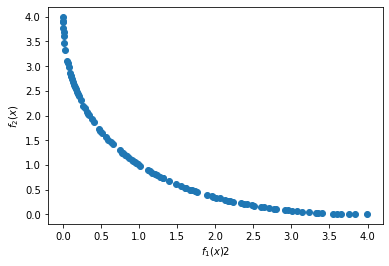

In [33]:

""" Defining Unconstrained Problems

    There are several ways to define problems in Platypus, but all revolve around the Problem class. For unconstrained problems,
    the problem is defined by a function that accepts a single argument, a list of decision variables, and returns a list of objective values.
    For example, the bi-objective, Schaffer problem, defined by
"""


def schaffer(x):
    return [x[0]**2, (x[0]-2)**2]

# When creating the Problem class, we provide two arguments: the number if decision variables, 1, and the number of objectives, 2.
problem = pty.Problem(1, 2)
# Next,  we specify the types of the decision variables. In this case, we use a real-valued variable bounded between -10 and 10.
problem.types[:] = pty.Real(-10, 10)
#  Finally, we define the function for evaluating the problem.
problem.function = schaffer


# An equivalent but more reusable way to define this problem is extending the Problem class.
# The types are defined in the __init__ method, and the actual evaluation is performed in the evaluate method.
class Schaffer(pty.Problem):

    def __init__(self):
        super(Schaffer, self).__init__(1, 2)
        self.types[:] = pty.Real(-10, 10)

    def evaluate(self, solution):
        x = solution.variables[:]
        solution.objectives[:] = [x[0] ** 2, (x[0] - 2) ** 2]


problem = Schaffer()

algorithm = pty.NSGAII(problem)
algorithm.run(10000)
# display the results
for solution in algorithm.result:
    print(solution.objectives)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlabel("$f_1(x)2$")
plt.ylabel("$f_2(x)$")
plt.show()

# Problem 7

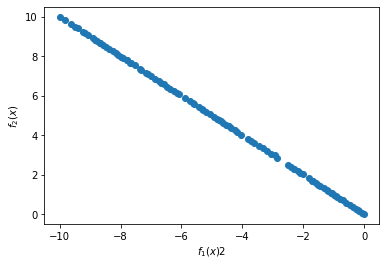

In [35]:
""" Defining Constrained Problems

Constrained problems are defined similarly, but must provide two additional pieces of information. 
First, they must compute the constraint value (or values if the problem defines more than one constraint).
Second, they must specify when constraint is feasible and infeasible. To demonstrate this, we will use the Belegundu problem, defined by:

 (-2x+y, 2x+y)  subject to y-x <= 1 & x+y <= 7

This problem has two inequality constraints. We first simplify the constraints by moving the constant to the left of the inequality. The resulting formulation is:

(-2x+y, 2x+y)  subject to  y-x-1 <= 0 & x+y-7 <= 0

Then, we program this problem within Platypus as follows:
"""


def belegundu(vars):
    x = vars[0]
    y = vars[1]
    return [-2*x + y, 2*x + y], [-x + y - 1, x + y - 7]

# First, we call Problem(2, 2, 2) to create a problem with two decision variables, two objectives, and two constraints, respectively.
problem = pty.Problem(2, 2, 2)
# Next, we set the decision variable types and the constraint feasibility criteria.
problem.types[:] = [pty.Real(0, 5), pty.Real(0, 3)]
# The constraint feasibility criteria is specified as the string "<=0", meaning a solution is feasible if the constraint values are less than or equal to zero.
# Platypus is flexible in how constraints are defined, and can include inequality and equality constraints such as ">=0", "==0", or "!=5".
problem.constraints[:] = "<=0"
# Finally, we set the evaluation function. Note how the belegundu function returns a tuple (two lists) for the objectives and constraint
problem.function = belegundu


# Alternatively, we can develop a reusable class for this problem by extending the Problem class.
class Belegundu(pty.Problem):

    def __init__(self):
        super(Belegundu, self).__init__(2, 2, 2)
        self.types[:] = [pty.Real(0, 5), pty.Real(0, 3)]
        self.constraints[:] = "<=0"

    def evaluate(self, solution):
        x = solution.variables[0]
        y = solution.variables[1]
        solution.objectives[:] = [-2 * x + y, 2 * x + y]
        solution.constraints[:] = [-x + y - 1, x + y - 7]

# define algorithm to solve problem
algorithm = pty.NSGAII(problem)
#algorithm = NSGAII(Belegundu())


# solve problem
algorithm.run(10000)

# The final population could contain infeasible and dominated solutions if the number of function evaluations was insufficient (e.g. algorithm.Run(100)).
# In this case we would need to filter out the infeasible solutions:
feasible_solutions = [s for s in algorithm.result if s.feasible]

# We could also get only the non-dominated solutions:
nondominated_solutions = pty.nondominated(algorithm.result)


# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlabel("$f_1(x)2$")
plt.ylabel("$f_2(x)$")
plt.show()


# In these examples, we have assumed that the objectives are being minimized.
# Platypus is flexible and allows the optimization direction to be changed per objective by setting the directions attribute. For example:
# problem.directions[:] = Problem.MAXIMIZE

# References
  *[Platypus](https://platypus.readthedocs.io/en/latest/getting-started.html#installing-platypus)